In [9]:
!python -m venv new_env 

Importing Libraries

In [10]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import string
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import ConfusionMatrixDisplay

Data Preprocessing

In [12]:
df=pd.read_csv("C:/Users/tapiw/Documents/Projects/Sharon/Mental Health NLP/Combined_Data.csv")

In [13]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [14]:
df.groupby('status').describe()

Unnamed: 0                                       \
                          count          mean           std      min   
status                                                                 
Anxiety                  3888.0  33747.340535  17829.620748      0.0   
Bipolar                  2877.0  47813.527633   1930.643638  45394.0   
Depression              15404.0  25155.582316  12527.152951   6982.0   
Normal                  16351.0  24046.638554  16583.557735    733.0   
Personality disorder     1201.0  51254.000000    346.843144  50654.0   
Stress                   2669.0  37664.617834  10013.266598  27346.0   
Suicidal                10653.0  18325.178635   7448.871777   6985.0   

                                                            
                           25%      50%       75%      max  
status                                                      
Anxiety               34147.75  35119.5  52070.25  53042.0  
Bipolar               46113.00  46832.0  49934.00  50653.0  
Depression            14771.50  22053.5  38844.25  48287.0  
Normal                 4820.50  30760.0  37371.50  45393.0  
Personality disorder  50954.00  51254.0  51554.00  51854.0  
Stress                28618.00  29893.0  48801.00  49468.0  
Suicidal              12277.00  17692.0  23332.00  37657.0

In [15]:
print(df.dtypes)

Unnamed: 0     int64
statement     object
status        object
dtype: object


In [16]:
df['statement'] = df['statement'].astype(str)

Cleaning

In [17]:
def clean_text(text):
    """Removes all punctuation and special characters, converts text to lowercase."""
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return text.lower() 

df['cleaned_statement'] = df['statement'].apply(clean_text)

Label Encoding

In [18]:
le = LabelEncoder()
df['status_encoded'] = le.fit_transform(df['status'])

for i, status in enumerate(le.classes_):
    print(f"{status}: {i}")

Anxiety: 0
Bipolar: 1
Depression: 2
Normal: 3
Personality disorder: 4
Stress: 5
Suicidal: 6


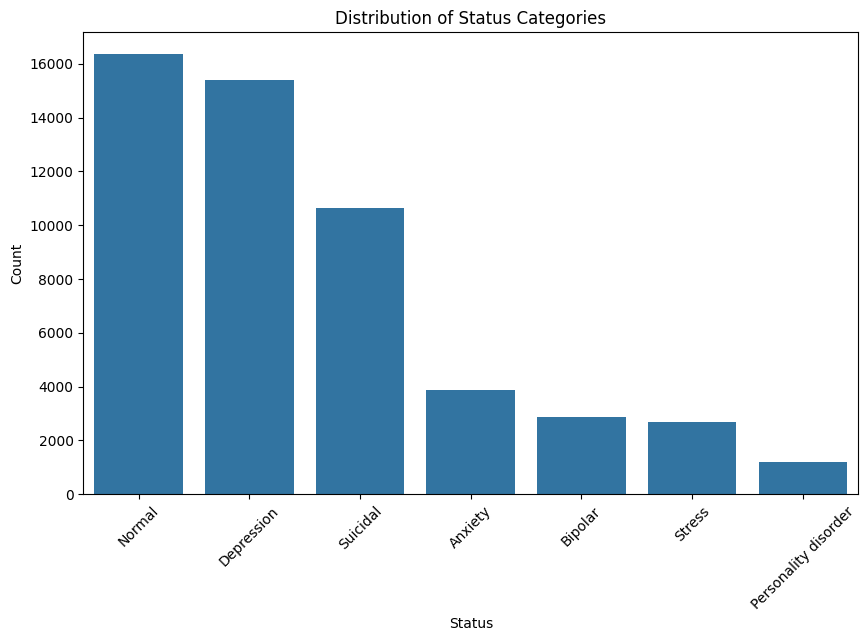

In [19]:

status_counts = df['status'].value_counts()

plt.figure(figsize=(10, 6)) 
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Categories')
plt.xticks(rotation=45)
plt.show()

In [20]:
df.sample(5)

,Unnamed: 0,statement,status,cleaned_statement,status_encoded
33704,33704,you should wet your shirt immediately.,Normal,you should wet your shirt immediately,3
48782,48782,impending doom I keep having to this feeling o...,Stress,impending doom i keep having to this feeling o...,5
8054,8054,That the odds of my existence was so slim it w...,Suicidal,that the odds of my existence was so slim it w...,6
47585,47585,"Excuses for work, etc. I'm in a depressive epi...",Depression,excuses for work etc im in a depressive episod...,2
38286,38286,why cant it just fucking stop the pain is just...,Depression,why cant it just fucking stop the pain is just...,2


In [21]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0           0
statement            0
status               0
cleaned_statement    0
status_encoded       0
dtype: int64

In [22]:
X = df['cleaned_statement']
y = df['status_encoded']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(37130,) (15913,) (37130,) (15913,)


Resampling

In [24]:
data = pd.DataFrame({'x_train': X_train, 'y_train': y_train})
grouped_data = data.groupby('y_train')

desired_counts = {
    0: 5000,
    1: 3500,
    2: 10495,
    3: 11000,
    4: 2000,
    5: 3500,
    6: 8000
}

resampled_data = pd.concat([
    grouped_data.get_group(i).sample(n=desired_counts[i], replace=True)
    for i in desired_counts.keys()
])

balanced_x_train = resampled_data['x_train']
balanced_y_train = resampled_data['y_train']

print(balanced_y_train.value_counts())

y_train
3    11000
2    10495
6     8000
0     5000
1     3500
5     3500
4     2000
Name: count, dtype: int64


In [35]:
!pip install tensorflow tensorflow-text tensorflow-hub -q --user

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.0 requires protobuf<6,>=3.20, but you have protobuf 3.19.6 which is incompatible.


In [36]:
pip show tensorflow tensorflow-hub tensorflow-text

Name: tensorflow
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\tapiw\appdata\roaming\python\python310\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tensorflow-text
---
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\tapiw\appdata\roaming\python\python310\site-packages
Requires: numpy, protobu

In [ ]:
#pip install protobuf==3.20.3


In [ ]:
#pip uninstall tensorflow tensorflow-intel tensorflow-serving-api tensorflow-hub tensorflow-text -y


In [ ]:
#pip cache purge

In [ ]:
#!python -m pip install --upgrade pip setuptools


In [37]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Input

In [38]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Model Building

In [39]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

sequence_output = outputs['sequence_output']


gru = tf.keras.layers.GRU(128, return_sequences=False)(sequence_output)
dropout1 = tf.keras.layers.Dropout(0.3)(gru)
dense1 = tf.keras.layers.Dense(64, activation='relu')(dropout1) 
x = tf.keras.layers.Dense(7, activation='softmax')(dense1) 

model = tf.keras.Model(inputs=[text_input], outputs=x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(balanced_x_train,
          balanced_y_train,
          epochs=5,
          batch_size=64  )

Epoch 1/5
680/680 [==============================] - 9317s 14s/step - loss: 0.8780 - accuracy: 0.6545
Epoch 2/5
680/680 [==============================] - 8273s 12s/step - loss: 0.5332 - accuracy: 0.7919
Epoch 3/5
680/680 [==============================] - 8069s 12s/step - loss: 0.3837 - accuracy: 0.8498
Epoch 4/5
680/680 [==============================] - 8040s 12s/step - loss: 0.2903 - accuracy: 0.8881
Epoch 5/5
680/680 [==============================] - 8542s 13s/step - loss: 0.2199 - accuracy: 0.9173


Inference

In [41]:
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test_classes))

498/498 [==============================] - 2938s 6s/step
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      1157
           1       0.86      0.72      0.78       864
           2       0.74      0.71      0.73      4608
           3       0.93      0.93      0.93      4993
           4       0.55      0.70      0.61       370
           5       0.65      0.70      0.68       819
           6       0.66      0.68      0.67      3102

    accuracy                           0.78     15913
   macro avg       0.74      0.75      0.74     15913
weighted avg       0.79      0.78      0.78     15913



<Figure size 800x600 with 0 Axes>

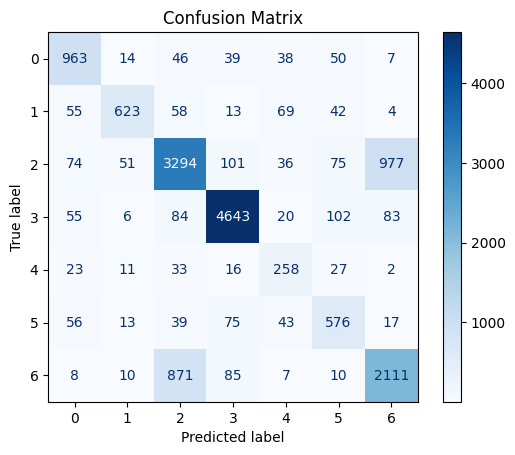

In [42]:
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Save the model

In [43]:
model.save('mental_health_model.h5')